Importing Libraries

In [32]:
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import classification_report

import os
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten


Main Directory Path

In [33]:
dataset_dir = r"E:\VSCode\BoneFractureCLSF\dataset"
os.listdir(dataset_dir)

['test', 'train', 'val']

Sub Directory Paths

In [34]:
sub_dirs = os.listdir(dataset_dir)
print(sub_dirs)

['test', 'train', 'val']


Getting the paths to all images

In [35]:
X_train = X_test = y_train = y_test = [],[],[],[]

for sub_dir in os.listdir(dataset_dir):
    print(sub_dir)
    for category in os.listdir(os.path.join(dataset_dir,sub_dir)):
        path1 = os.path.join(dataset_dir,sub_dir)
        print("\t",category)
        count = 0
        for image in os.listdir(os.path.join(path1,category)):
            if count<5:
                print("\t"*2,image)
                count += 1


test
	 fractured
		 0.png
		 00001.png
		 00004541.png
		 000151.png
		 000151594.png
	 not fractured
		 0.png
		 001.png
		 0013.png
		 004.png
		 0047.png
train
	 fractured
		 0.jpg
		 0.png
		 0._jumbo (1).jpeg
		 0._jumbo.jpeg
		 00004541.png
	 not fractured
		 0.png
		 001.png
		 0013.png
		 004.png
		 0047.png
val
	 fractured
		 0.png
		 000002.png
		 00004541.png
		 000151.png
		 000151594.png
	 not fractured
		 0.png
		 001.png
		 0013.png
		 004.png
		 0047.png


Printing out some samples

In [36]:
# X_train = []
# y_train = []
# X_test = []
# y_test = []

# for sub_dir in os.listdir(dataset_dir):
#     # print(sub_dir)
#     for category in os.listdir(os.path.join(dataset_dir,sub_dir)):
#         path1 = os.path.join(dataset_dir,sub_dir)
#         # print("\t",category)
#         # count = 0
#         for image in os.listdir(os.path.join(path1,category)):
#             #printing out some samples
#             # if count<20:
#             #     count += 1
#             print("_"*50,category)
#             path2 = os.path.join(path1,category)
#             img_path = os.path.join(path2,image)
#             try :  # there was some corrupted images
#                 img_array = imread(img_path)
#                 img_resize = resize(img_array,(150,150,1))
#                 # plt.imshow(img_resize)
#                 # plt.show()
#                 if sub_dir=='train':
#                     X_train.append(img_resize)
#                     y_train.append(category)
#                 elif sub_dir=='test':
#                     X_test.append(img_resize)
#                     y_test.append(category)
#                 # else:
#                 #     break
#             except Exception as e:
#                 print(f"unable to load image {image} : {e}")

# print(len(X_train),len(y_train))
# print(len(X_test),len(y_test))


In [ ]:
from concurrent.futures import ThreadPoolExecutor
from skimage.io import imread
from skimage.transform import resize
import os

X_train = []
y_train = []
X_test = []
y_test = []

dataset_dir = 'E:\VSCode\BoneFractureCLSF\dataset'

def load_and_resize(img_path):
    try:
        img_array = imread(img_path)
        img_resize = resize(img_array, (150, 150, 1))
        if img_resize.shape == (150,150,1):
            return img_resize
    except Exception as e:
        print(f"unable to load image {img_path} : {e}")
        return None

for sub_dir in os.listdir(dataset_dir):
    if sub_dir in ['train','test']:
        path1 = os.path.join(dataset_dir, sub_dir)
        for category in os.listdir(path1):
            path2 = os.path.join(path1, category)
            print(f"{sub_dir:_^50}{category:_^50}")

            image_paths = [os.path.join(path2, image) for image in os.listdir(path2)]

            with ThreadPoolExecutor(max_workers=8) as executor:
                resized_images = list(executor.map(load_and_resize, image_paths))

            for img in resized_images:
                if img is not None:
                    if sub_dir == 'train':
                        X_train.append(img)
                        y_train.append(category)
                    elif sub_dir == 'test':
                        X_test.append(img)
                        y_test.append(category)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))


_______________________test___________________________________________fractured_____________________
_______________________test_________________________________________not fractured___________________
unable to load image E:\VSCode\BoneFractureCLSF\dataset\test\not fractured\IMG0004134.jpg : image file is truncated (1 bytes not processed)
unable to load image E:\VSCode\BoneFractureCLSF\dataset\test\not fractured\IMG0004143.jpg : image file is truncated (10 bytes not processed)
unable to load image E:\VSCode\BoneFractureCLSF\dataset\test\not fractured\IMG0004148.jpg : image file is truncated (14 bytes not processed)
unable to load image E:\VSCode\BoneFractureCLSF\dataset\test\not fractured\IMG0004149.jpg : image file is truncated (33 bytes not processed)
unable to load image E:\VSCode\BoneFractureCLSF\dataset\test\not fractured\IMG0004308.jpg : image file is truncated (40 bytes not processed)
unable to load image E:\VSCode\BoneFractureCLSF\dataset\test\not fractured\IMG0004347.jpg : im

In [59]:
print(y_train)
print(y_test)

['fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured', 'fractured'

In [60]:
convert_target = lambda x: 0 if x =='not fractured' else 1

In [61]:
y_train_c = list(map(convert_target,y_train))
y_test_c = list(map(convert_target,y_test))

print(y_train_c)
print(y_test_c)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Looking of images with different shape

In [62]:
[i.shape for i in X_train if i.shape != (150,150,1)]

[]

In [64]:
X_train_c = np.array(X_train)
y_train_c = np.array(y_train_c)
X_test_c = np.array(X_test)
y_test_c = np.array(y_test_c)

In [66]:
X_train_c.shape,y_train_c.shape

((9237, 150, 150, 1), (9237,))

In [67]:
X_test_c.shape,y_test_c.shape

((500, 150, 150, 1), (500,))

In [68]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))

c:\Users\RUN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [74]:
model.fit(X_train_c,y_train_c,epochs=10,batch_size=64)

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 39s 267ms/step - accuracy: 1.0000 - loss: 1.5702e-05
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 38s 265ms/step - accuracy: 1.0000 - loss: 1.1964e-05
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 258ms/step - accuracy: 1.0000 - loss: 1.0000e-05
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 258ms/step - accuracy: 1.0000 - loss: 9.2070e-06
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 37s 255ms/step - accuracy: 1.0000 - loss: 8.0644e-06
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 43s 297ms/step - accuracy: 1.0000 - loss: 8.6687e-06
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 41s 280ms/step - accuracy: 1.0000 - loss: 6.9054e-06
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 40s 277ms/step - accuracy: 1.0000 - loss: 5.4505e-06
Epoch 9/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 39s 267ms/step - accuracy: 1.0000 - loss: 6.6344e-06
Epoch 10/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 36s 247ms/step - accuracy: 1.0000 - loss: 5.3180e-06


Function to predict Image

In [79]:
def pred_img(img_path):
    img = imread(img_path)
    plt.imshow(img)
    plt.show()
    img_resize = resize(img,(150,150,1))
    img2 = img_resize.reshape(1,150,150,1)
    pred = model.predict(img2)
    ind = pred.argmax()
    if ind:
        print("Fractured")
    else:
        print("Not fractured")

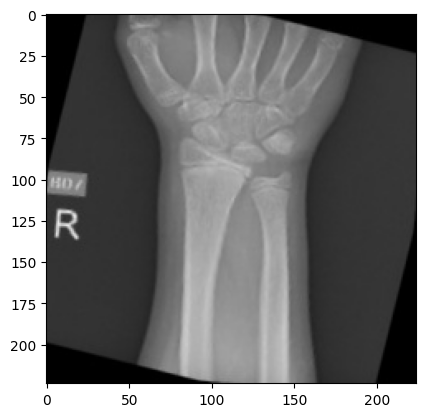

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Not fractured


In [80]:
img_path = r'dataset/val/not fractured/1-rotated2-rotated2-rotated2.jpg'
pred_img(img_path)

In [82]:
model.save("model.keras")